In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Load the Dataset

In [2]:
ratings=pd.read_csv('ratings.csv')
movies=pd.read_csv('movies.csv')
tags=pd.read_csv('tags.csv')
links=pd.read_csv('links.csv')
# display
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# check unique movies
unique_movies = movies['movieId'].unique().tolist()
print(len(unique_movies))

9742


In [5]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
#describe the data
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Data Cleaning

In [9]:
movies.isnull().any()


movieId    False
title      False
genres     False
dtype: bool

In [10]:
ratings.isnull().any()


userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [11]:
df = pd.merge(ratings,movies,on='movieId')
df= df.drop(['timestamp'], axis=1)
df

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [12]:
#get numerical column
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['userId', 'movieId', 'rating']

In [13]:
#get categorical column
catColumn  = [col for col in df.columns if  df[col].dtype == "O"]
catColumn

['title', 'genres']

In [15]:
df.shape

(100836, 5)

Dataset Basic Informations
● Frist dataset consists of 100003 rows and 4 columns.

●Second The dataset consists of 1682 rows and 2columns.

● There is Null data through 1 column and i will drop it .

● No duplicate data in dataset .

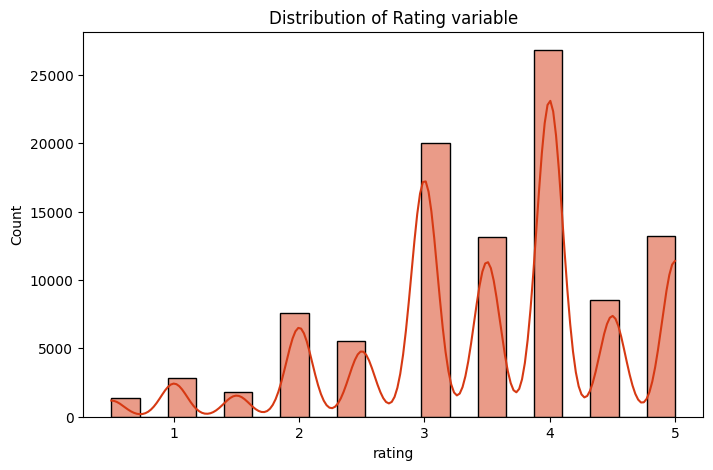

In [17]:
plt.figure(figsize=(8,5))
sns.histplot( x = df["rating"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of Rating variable");

Basic Numeric analaysis

● Data is not Normaly Distributed

● Skeynees detected (left&right)

C:\Users\ANON L\AppData\Local\Temp\ipykernel_9800\32450284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[0], x = "rating", y = "movieId", data = df, width = 0.7, orient = "v", fliersize = 5,
C:\Users\ANON L\AppData\Local\Temp\ipykernel_9800\32450284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[1], x = "rating", y = "userId", data = df, width = 0.7, orient = "v", fliersize = 5,


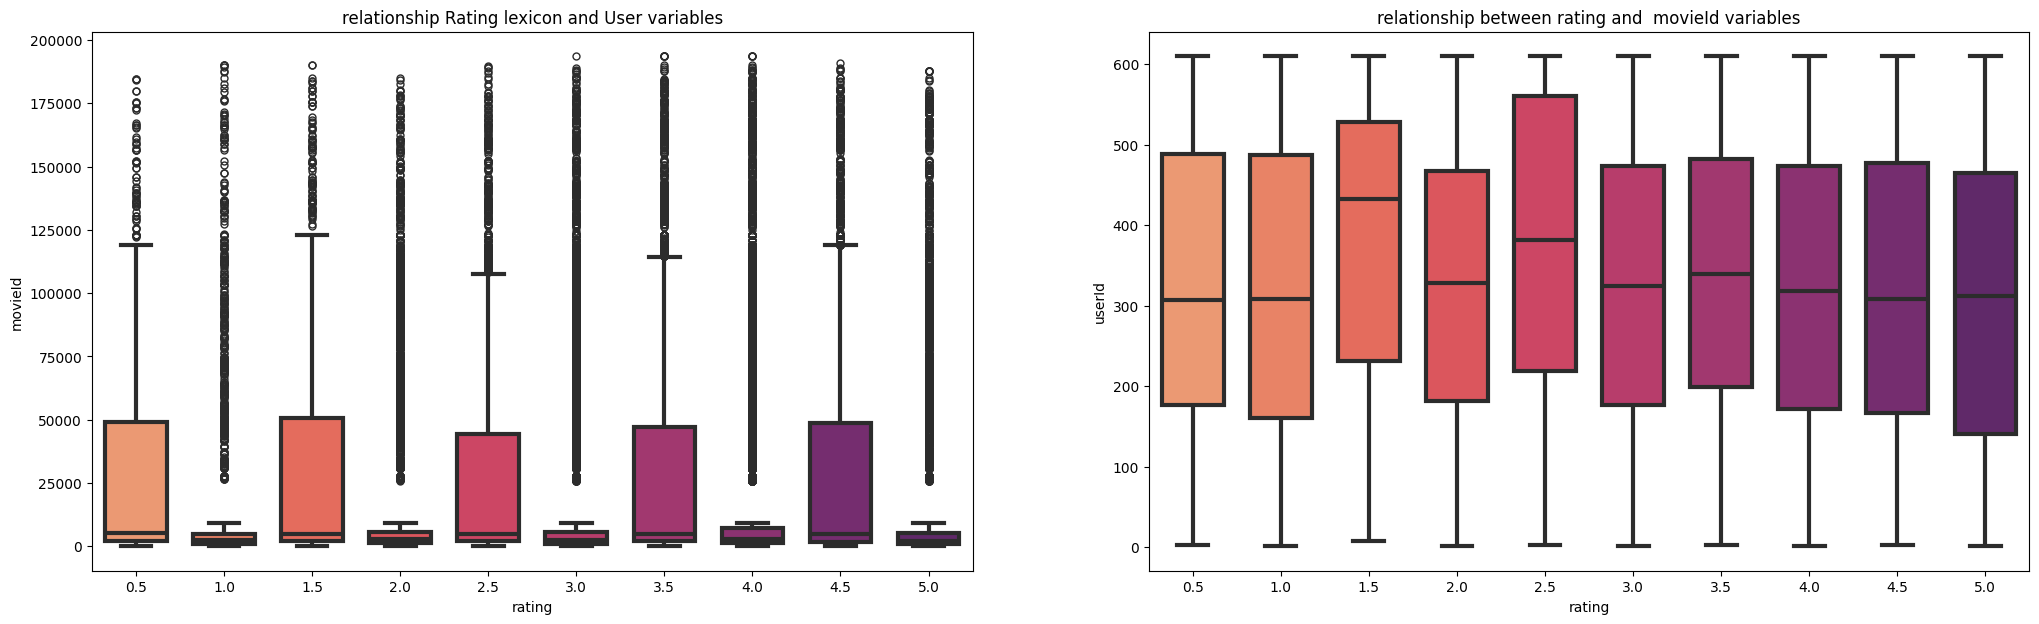

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (25, 7))
sns.boxplot(ax = axes[0], x = "rating", y = "movieId", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between rating and  movieId variables");

sns.boxplot(ax = axes[1], x = "rating", y = "userId", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship Rating lexicon and User variables");  

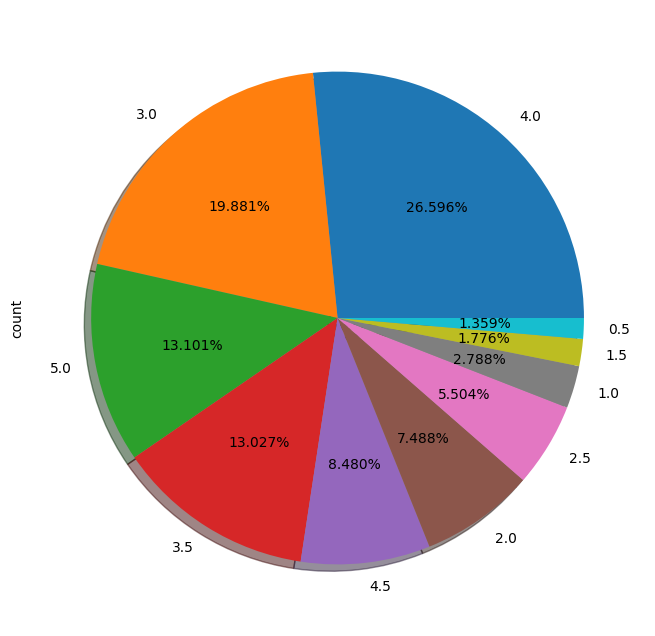

In [19]:
plt.figure(figsize = [8, 8], clear = True, )
df["rating"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);